 # 广告转化率

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif']='SimHei'

#### 数据预处理

1. 数据加载

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
ad = pd.read_csv('data/ad.csv')
app_cate = pd.read_csv('data/app_categories.csv')

 - 合并数据

In [3]:
train_ad = pd.merge(train,ad,on='creativeID',how='left')
test_ad = pd.merge(test,ad,on='creativeID',how='left')
train_ad_app = pd.merge(train_ad,app_cate ,on='appID',how='left')
test_ad_app= pd.merge(test_ad,app_cate ,on='appID',how='left')

In [4]:
train_ad_app.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1,108
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2,2
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1,209
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1,209
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1,201


In [5]:
train_ad_app.describe() # 数值型

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
count,3.749528e+06,3.749528e+06,93262.000000,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06
mean,2.487300e-02,2.418317e+05,242645.358013,3.261575e+03,1.405349e+06,3.702799e+03,1.222590e+00,1.605879e+00,2.005435e+03,4.155907e+02,2.776200e+01,3.703212e+02,1.217947e+00,1.819372e+02
std,1.557380e-01,3.958793e+04,39285.385532,1.829643e+03,8.088094e+05,1.923724e+03,5.744428e-01,8.491127e-01,1.250836e+03,2.134300e+02,3.274570e+01,1.440570e+02,4.128515e-01,1.032034e+02
min,0.000000e+00,1.700000e+05,170005.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,1.000000e+00,0.000000e+00
25%,0.000000e+00,2.116270e+05,211626.000000,1.540000e+03,7.058698e+05,2.579000e+03,1.000000e+00,1.000000e+00,7.610000e+02,2.050000e+02,3.000000e+00,3.600000e+02,1.000000e+00,1.040000e+02
50%,0.000000e+00,2.418390e+05,242106.000000,3.465000e+03,1.407062e+06,3.322000e+03,1.000000e+00,1.000000e+00,1.977000e+03,4.600000e+02,3.000000e+00,4.650000e+02,1.000000e+00,2.090000e+02
75%,0.000000e+00,2.722170e+05,272344.000000,4.565000e+03,2.105989e+06,4.896000e+03,1.000000e+00,2.000000e+00,3.242000e+03,6.320000e+02,5.600000e+01,4.650000e+02,1.000000e+00,2.090000e+02
max,1.000000e+00,3.023590e+05,302359.000000,6.582000e+03,2.805118e+06,7.645000e+03,4.000000e+00,3.000000e+00,3.616000e+03,7.200000e+02,9.100000e+01,4.720000e+02,2.000000e+00,5.030000e+02


2.  数据清洗

- 查看缺失值

In [6]:
train_ad_app.isnull().sum()

label                     0
clickTime                 0
conversionTime      3656266
creativeID                0
userID                    0
positionID                0
connectionType            0
telecomsOperator          0
adID                      0
camgaignID                0
advertiserID              0
appID                     0
appPlatform               0
appCategory               0
dtype: int64

In [7]:
import missingno

<AxesSubplot:>

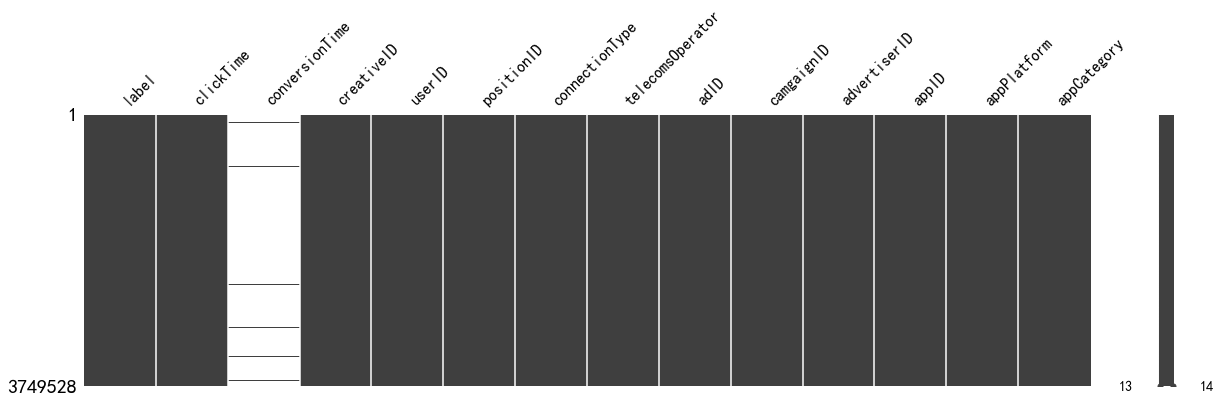

In [8]:
missingno.matrix(train_ad_app,figsize=(20,5))

3. 数据分析

- 广告点击行为分析

1. 广告点击数最高的10款广告

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '596347'),
 Text(0, 0, '202727'),
 Text(0, 0, '189283'),
 Text(0, 0, '154066'),
 Text(0, 0, '123791'),
 Text(0, 0, '122637'),
 Text(0, 0, '120634'),
 Text(0, 0, '116427'),
 Text(0, 0, '115527'),
 Text(0, 0, '91608'),
 Text(0, 0, '77812'),
 Text(0, 0, '58672'),
 Text(0, 0, '56433'),
 Text(0, 0, '43416'),
 Text(0, 0, '43349'),
 Text(0, 0, '39468'),
 Text(0, 0, '37149'),
 Text(0, 0, '31714'),
 Text(0, 0, '27923'),
 Text(0, 0, '26097')]

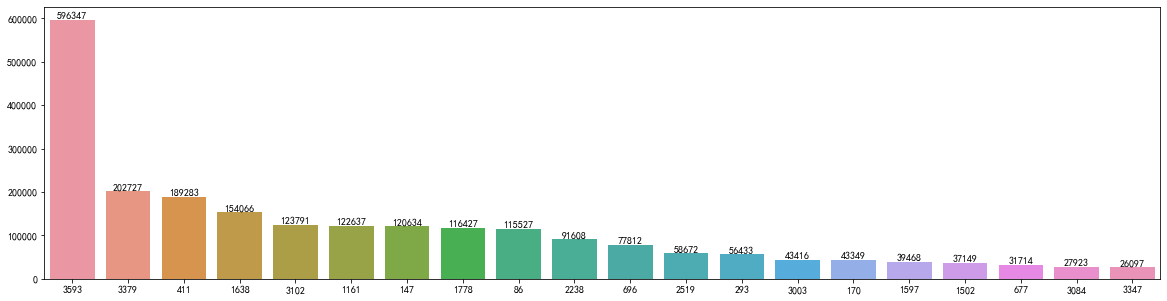

In [9]:
# 广告种类
import seaborn as sns
plt.figure(figsize=(20,5))
adid = train_ad_app['adID'].value_counts()[:20]
g = sns.barplot(adid.index,adid.values,order=adid.index)
plt.bar_label(g.containers[0])


#### 分析：3593号广告在17至30日之间被点击次数与其他广告差距较大，受欢迎程度最高。可加大对该广告的曝光率

In [10]:
# 广告点击数大于10000的广告
adid[adid.values>10000]

3593    596347
3379    202727
411     189283
1638    154066
3102    123791
1161    122637
147     120634
1778    116427
86      115527
2238     91608
696      77812
2519     58672
293      56433
3003     43416
170      43349
1597     39468
1502     37149
677      31714
3084     27923
3347     26097
Name: adID, dtype: int64

In [11]:
# 日期处理 获取每条样本的点击时间
def day(date):
    if date:
        return str(date)[:2]
    else:
        return date

In [12]:
# 用户点击时间
train_ad_app['click_time'] = train_ad_app['clickTime'].apply(day)


2. 每日app点击广告总次数

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '334397'),
 Text(0, 0, '325921'),
 Text(0, 0, '308596'),
 Text(0, 0, '301769'),
 Text(0, 0, '297825'),
 Text(0, 0, '296714'),
 Text(0, 0, '294553'),
 Text(0, 0, '288433'),
 Text(0, 0, '285242'),
 Text(0, 0, '278634'),
 Text(0, 0, '266833'),
 Text(0, 0, '206462'),
 Text(0, 0, '159991'),
 Text(0, 0, '104158')]

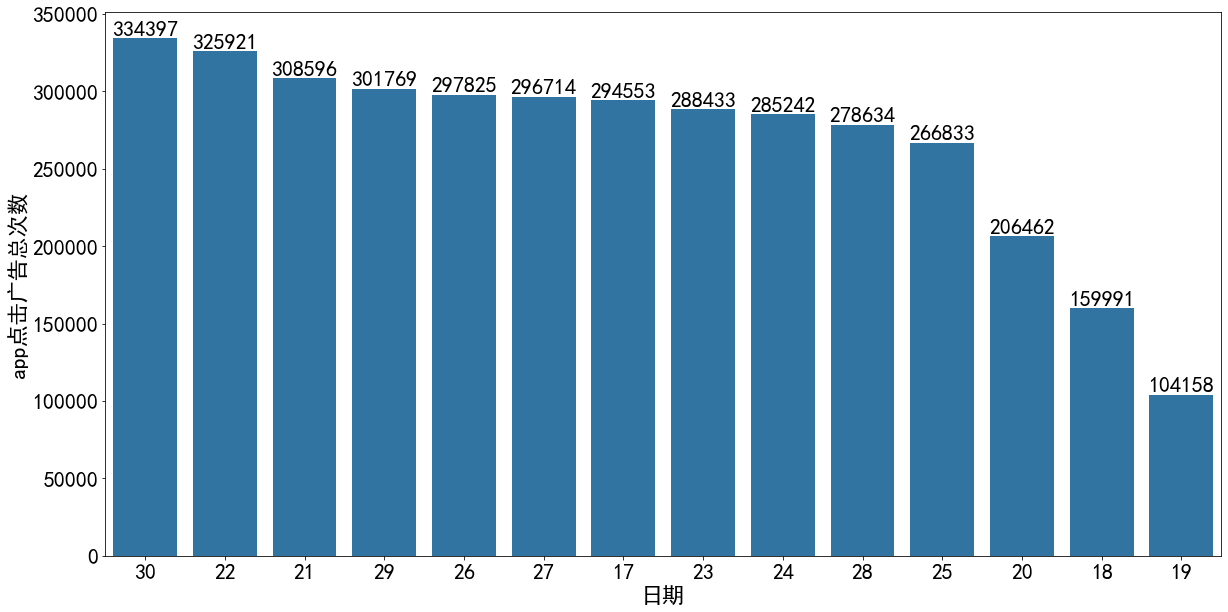

In [13]:
app_click_counts=train_ad_app['click_time'].value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(app_click_counts.index,app_click_counts.values,color=sns.color_palette()[0])
plt.xlabel('日期',fontsize=22)
plt.ylabel('app点击广告总次数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=22)

3. 每日广告安装次数

In [14]:
install = train_ad_app[train_ad_app['label']==1]

In [15]:
install = install['click_time'].value_counts()

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '7736'),
 Text(0, 0, '7649'),
 Text(0, 0, '7607'),
 Text(0, 0, '7464'),
 Text(0, 0, '7462'),
 Text(0, 0, '7382'),
 Text(0, 0, '7376'),
 Text(0, 0, '7371'),
 Text(0, 0, '7343'),
 Text(0, 0, '7121'),
 Text(0, 0, '6308'),
 Text(0, 0, '5056'),
 Text(0, 0, '4101'),
 Text(0, 0, '3286')]

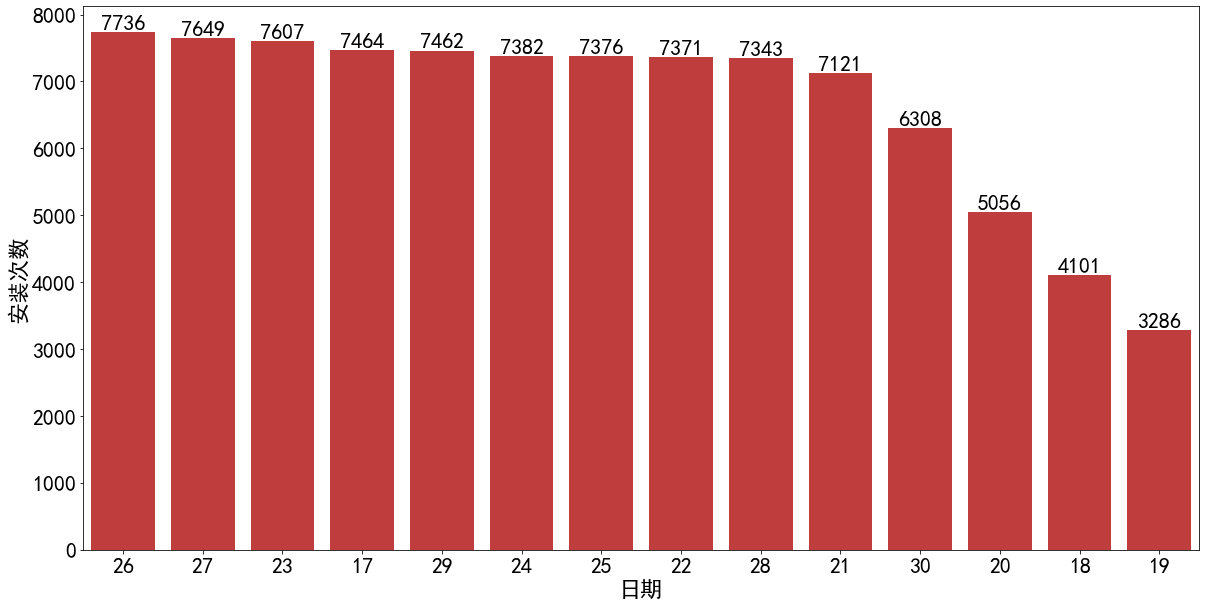

In [16]:

plt.figure(figsize=(20,10))
g = sns.barplot(install.index,install.values,color=sns.color_palette()[3])
plt.xlabel('日期',fontsize=22)
plt.ylabel('安装次数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=22)

4. 每日广告转化率

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0.0253401'),
 Text(0, 0, '0.0256327'),
 Text(0, 0, '0.0315482'),
 Text(0, 0, '0.0244888'),
 Text(0, 0, '0.0230755'),
 Text(0, 0, '0.0226159'),
 Text(0, 0, '0.0263735'),
 Text(0, 0, '0.0258798'),
 Text(0, 0, '0.0276428'),
 Text(0, 0, '0.025975'),
 Text(0, 0, '0.025779'),
 Text(0, 0, '0.0263536'),
 Text(0, 0, '0.0247275'),
 Text(0, 0, '0.0188638')]

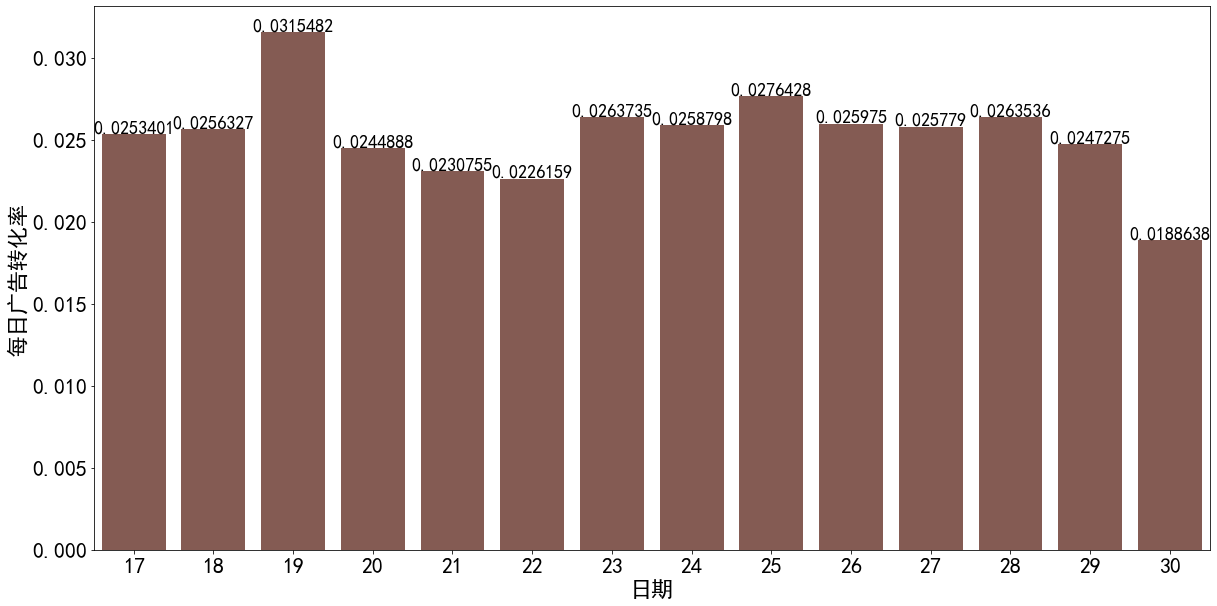

In [17]:
conversion = install/app_click_counts
plt.figure(figsize=(20,10))
g = sns.barplot(conversion.index,conversion.values,color=sns.color_palette()[5])
plt.xlabel('日期',fontsize=22)
plt.ylabel('每日广告转化率',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=18)

 #### 分析：19日的总点击次数104158次，安装次数为3286,每日转化率在0.0315。在17日至30日之间总点击次数，但在每日转化率中是最多的，建议着重查看当天情况

- 用户分析

1. 每日用户点击次数（每个用户每日只算一次点击量）

In [18]:
t =train_ad_app[['click_time','userID']].drop_duplicates()
app_click =t['click_time'].value_counts()

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '291928'),
 Text(0, 0, '280695'),
 Text(0, 0, '267377'),
 Text(0, 0, '264985'),
 Text(0, 0, '259967'),
 Text(0, 0, '257697'),
 Text(0, 0, '253303'),
 Text(0, 0, '251576'),
 Text(0, 0, '250436'),
 Text(0, 0, '243173'),
 Text(0, 0, '236026'),
 Text(0, 0, '183233'),
 Text(0, 0, '143926'),
 Text(0, 0, '93273')]

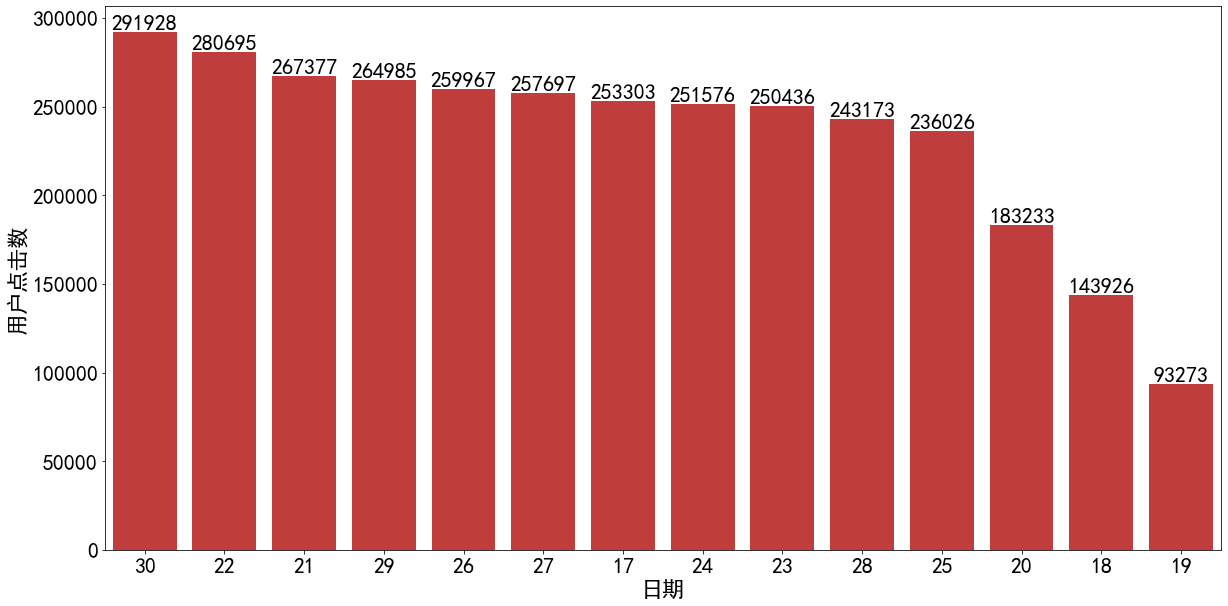

In [19]:
plt.figure(figsize=(20,10))
g = sns.barplot(app_click.index,app_click.values,color=sns.color_palette()[3])
plt.xlabel('日期',fontsize=22)
plt.ylabel('用户点击数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 在柱状图上显示数值
plt.bar_label(g.containers[0],fontsize=22)

- app 分析

1. appid点击次数 (每种app在每天的点击只算一次)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '40'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '36'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '34'),
 Text(0, 0, '33'),
 Text(0, 0, '33')]

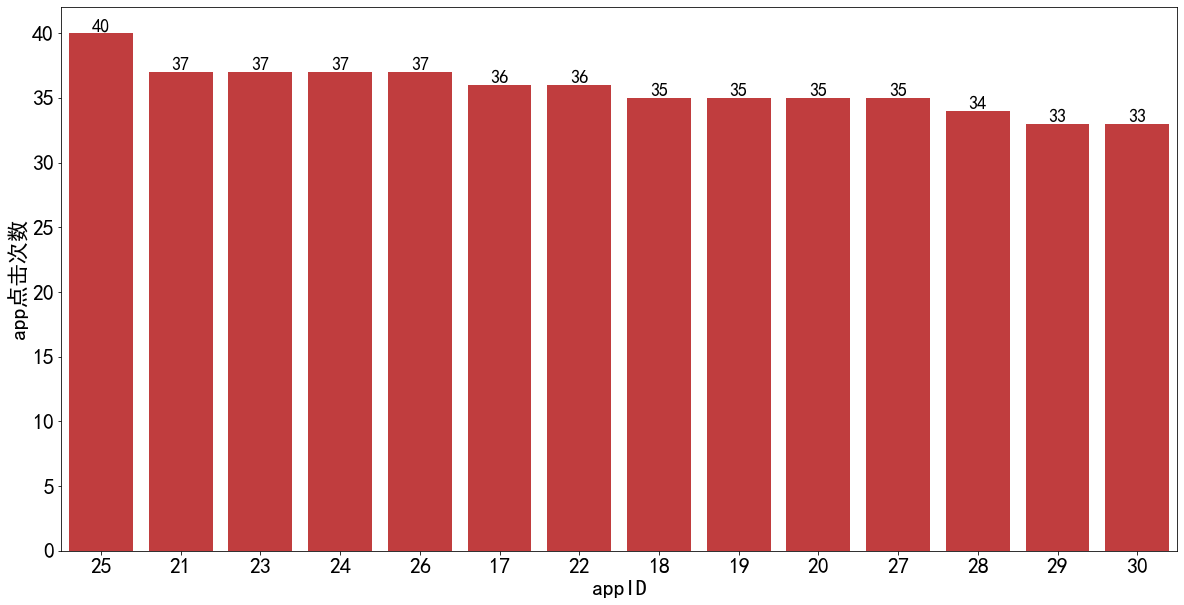

In [20]:
t = train_ad_app[['click_time','appID']].drop_duplicates()
t = t.click_time.value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(t.index,t.values,color=sns.color_palette()[3])
plt.xlabel('appID',fontsize=22)
plt.ylabel('app点击次数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=18)

- app种类

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '151'),
 Text(0, 0, '478733'),
 Text(0, 0, '29238'),
 Text(0, 0, '430002'),
 Text(0, 0, '224'),
 Text(0, 0, '211308'),
 Text(0, 0, '314182'),
 Text(0, 0, '15344'),
 Text(0, 0, '1.91665e+06'),
 Text(0, 0, '45539'),
 Text(0, 0, '214304'),
 Text(0, 0, '33364'),
 Text(0, 0, '63'),
 Text(0, 0, '60430')]

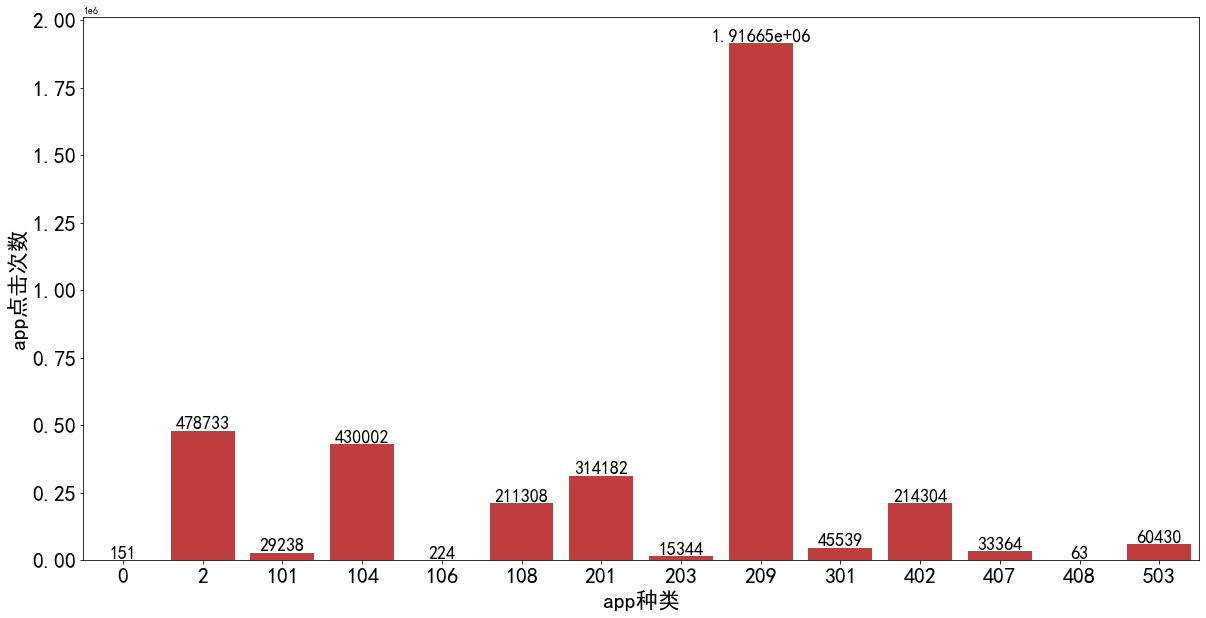

In [21]:
t = train_ad_app['appCategory'].value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(t.index,t.values,color=sns.color_palette()[3])
plt.xlabel('app种类',fontsize=22)
plt.ylabel('app点击次数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=18)

In [22]:
train_ad_app.appID.drop_duplicates().count()

50

- app种类 （每日点击的appcate，只算一次）

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10')]

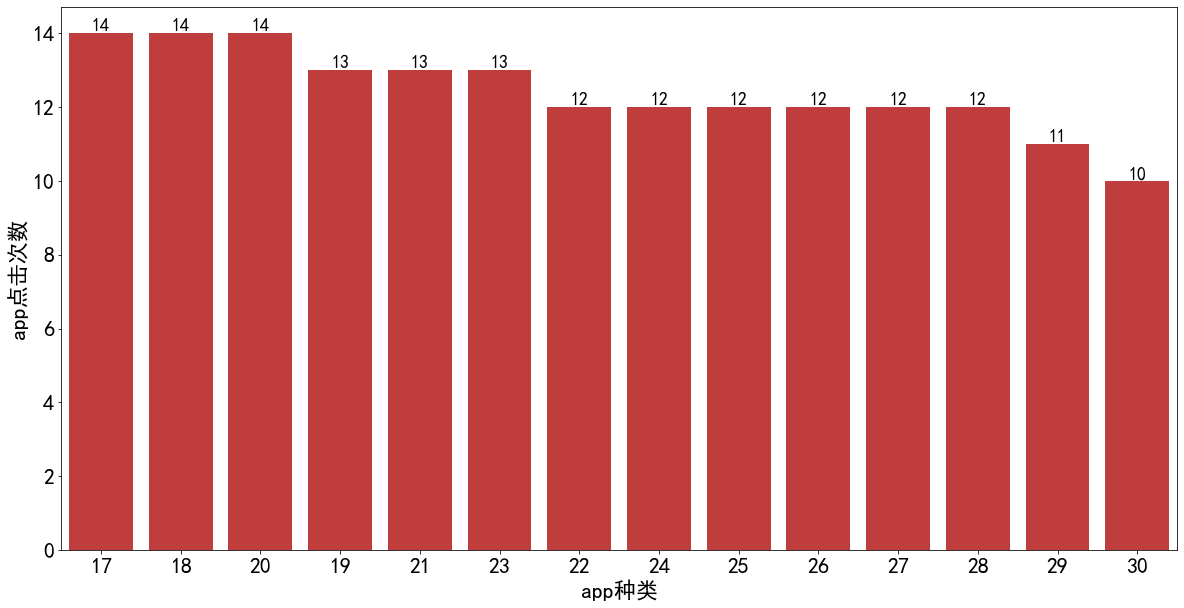

In [23]:
t = train_ad_app[['click_time','appCategory']].drop_duplicates()
t = t.click_time.value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(t.index,t.values,color=sns.color_palette()[3])
plt.xlabel('app种类',fontsize=22)
plt.ylabel('app点击次数',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.bar_label(g.containers[0],fontsize=18)

# 特征工程

- 特征预处理

In [24]:
# 加载user表
user = pd.read_csv('data/user.csv')

In [25]:
user.head()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,1,42,1,0,2,0,512,503
1,2,18,1,5,1,0,1403,1403
2,3,0,2,4,0,0,0,0
3,4,21,2,5,3,0,607,607
4,5,22,2,0,0,0,0,1301


In [26]:
# 处理字段
# appCategory app类属，百位是一级类属，个十位是二级类属
# 、age、 年龄分段
# hometown、籍贯地，千百位是省 个十位是市
# residence、常住地，千百位是省 个十位是市
# clickTime  中间两位表示小时

# appcate 一级类属
def appcate_first(appcate):
    appcate = str(appcate)
    if len(appcate)==1:
        return int(appcate)
    else:
        return int(appcate[0])

# appcate 二级类属
def appcate_second(appcate):
    appcate = str(appcate)
    if len(appcate)<3:
        return 0
    else:
        return int(appcate[1:])
# 年龄分段
def get_age(age):
    if age<15:
        return 0
    elif age<25:
        return 1
    elif age<40:
        return 2
    else:
        return 3
def provinces(hometown):
    if hometown==0:
        return 0
    hometown = str(hometown)
    if len(hometown)==3:
        return int(hometown[0])
    if len(hometown)==4:
        return int(hometown[:2])

def city(hometown):
    if hometown==0:
        return 0
    hometown = str(hometown)
    if len(hometown)>=3:
        return int(hometown[-2:])
 
def hour_time(time):
    time = str(time) 
    time = int(time[2:4])
    if time<6:
        return 0
    elif time<12:
        return 1
    elif time<18:
        return 2
    else:
        return 3


- 添加新列


In [27]:
user['discrete_age']=user['age'].apply(get_age)
user['home_provinces']  =user['hometown'].apply(provinces)
user['home_city'] = user['hometown'].apply(city)
user['residen_provinces'] = user['residence'].apply(provinces)
user['residen_city']=user['residence'].apply(city)

In [28]:
# 合并数据
train_ad_app_user = pd.merge(train_ad_app,user,on='userID')

In [29]:
train_ad_app_user['hour_time']=train_ad_app_user['clickTime'].apply(hour_time)
train_ad_app_user['appcate_first'] = train_ad_app_user['appCategory'].apply(appcate_first)
train_ad_app_user['appcate_second'] = train_ad_app_user['appCategory'].apply(appcate_second)

In [30]:
train_ad_app_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749528 entries, 0 to 3749527
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   label              int64  
 1   clickTime          int64  
 2   conversionTime     float64
 3   creativeID         int64  
 4   userID             int64  
 5   positionID         int64  
 6   connectionType     int64  
 7   telecomsOperator   int64  
 8   adID               int64  
 9   camgaignID         int64  
 10  advertiserID       int64  
 11  appID              int64  
 12  appPlatform        int64  
 13  appCategory        int64  
 14  click_time         object 
 15  age                int64  
 16  gender             int64  
 17  education          int64  
 18  marriageStatus     int64  
 19  haveBaby           int64  
 20  hometown           int64  
 21  residence          int64  
 22  discrete_age       int64  
 23  home_provinces     int64  
 24  home_city          int64  
 25  residen_provinces 

- 性别与点击次数

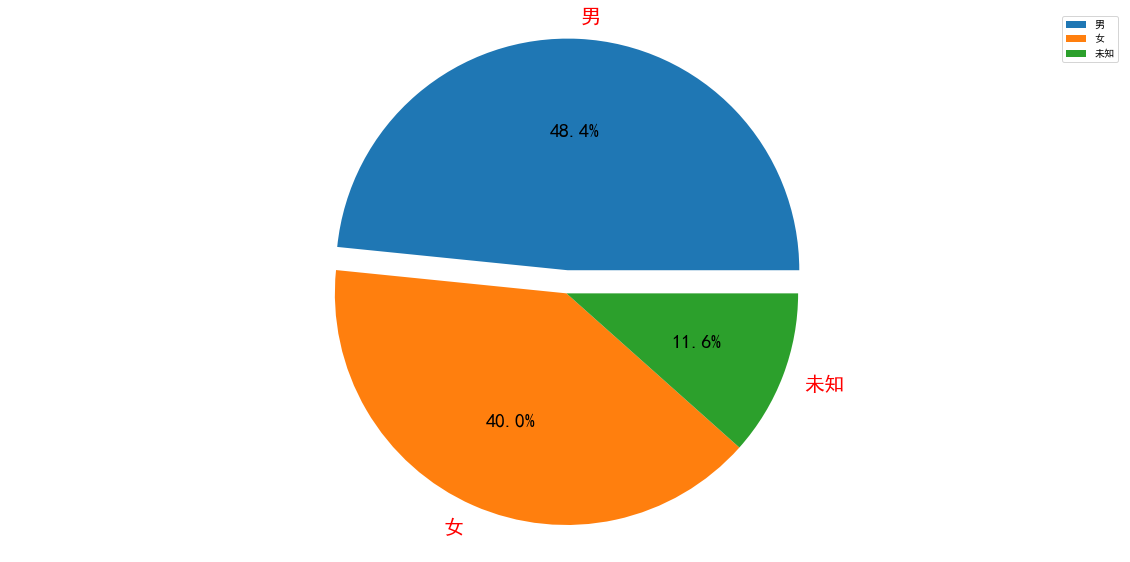

In [31]:
t = train_ad_app_user['gender'].value_counts()
plt.figure(figsize=(20,10))
pychar,ltext,ptext = plt.pie(t.values,explode=(0.1,0,0),labels=['男','女','未知'],autopct='%1.1f%%')
plt.axis('equal')
for i in  ltext:
    i.set_size(20)
    i.set_color('red')
    if i==1:
        ltext[i]='男'
for j in ptext:
    j.set_size(20)
plt.legend()


#### 分析：男生点击广告次数比女生多，男生比女生对广告更感兴趣

- 各年龄段对广告感兴趣程度

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

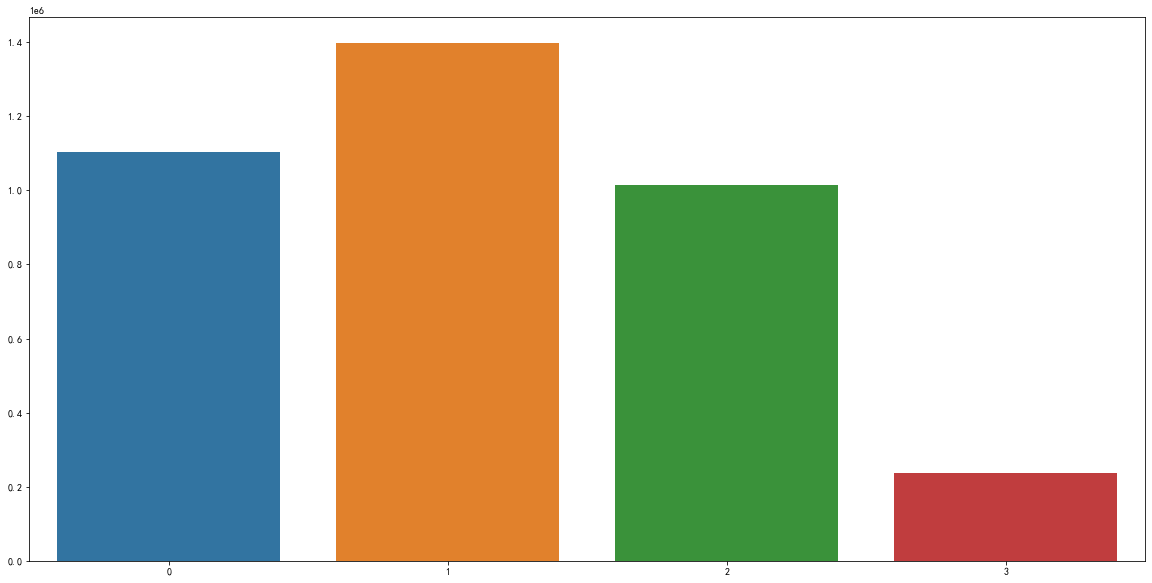

In [32]:
t = train_ad_app_user['discrete_age'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(t.index,t.values)

#### 分析： 15岁到25岁这个年龄段对广告更感兴趣

In [33]:
train_ad_app_user.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,hometown,residence,discrete_age,home_provinces,home_city,residen_provinces,residen_city,hour_time,appcate_first,appcate_second
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,...,0,1301,2,0,0,13,1,0,1,8
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,...,0,213,1,0,0,2,13,0,2,0
2,0,251337,NaN,3307,463234,6161,1,2,17,216,...,0,213,1,0,0,2,13,2,2,0
3,0,260055,NaN,784,463234,6161,1,0,3242,375,...,0,213,1,0,0,2,13,0,2,0
4,0,170000,NaN,4465,1857485,7434,4,1,147,460,...,0,1502,1,0,0,15,2,0,2,9


- 一天当中哪个时间段点击广告最活跃

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '时间段内总点击次数')

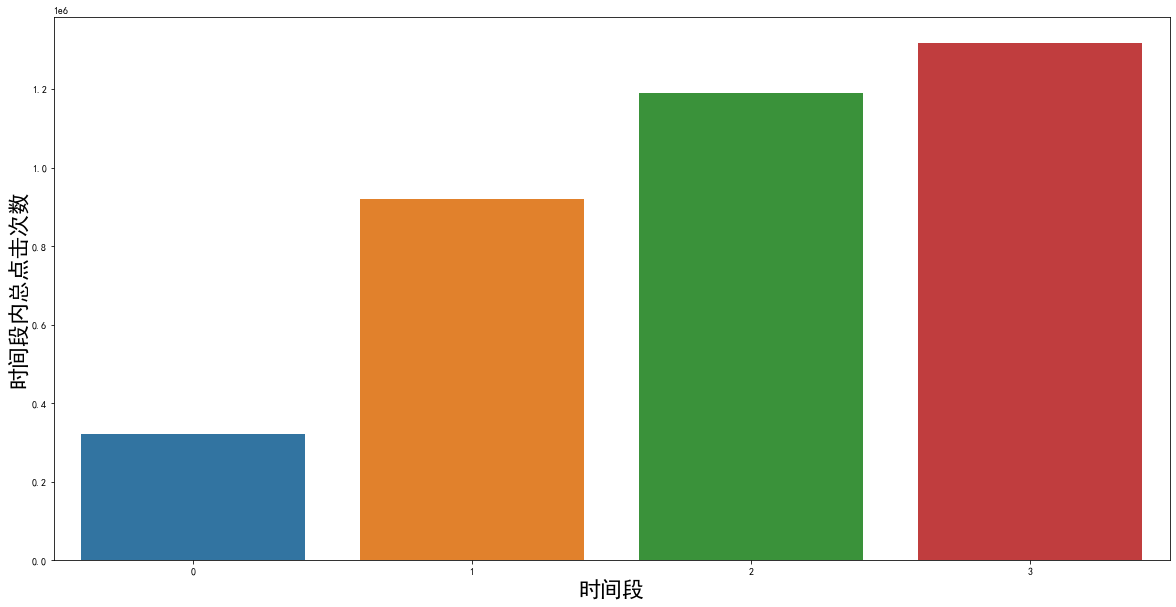

In [34]:
t = train_ad_app_user['hour_time'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(t.index,t.values)
plt.xlabel('时间段',fontsize=22)
plt.ylabel('时间段内总点击次数',fontsize=22)



#### 分析： 18点至24点广告点击最为活跃


In [35]:
train_ad_app_user.columns

Index(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'adID',
       'camgaignID', 'advertiserID', 'appID', 'appPlatform', 'appCategory',
       'click_time', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'discrete_age', 'home_provinces',
       'home_city', 'residen_provinces', 'residen_city', 'hour_time',
       'appcate_first', 'appcate_second'],
      dtype='object')

- 特征构建

In [36]:
# 删除特征重复项
train_ad_app_user = train_ad_app_user.loc[:,~train_ad_app_user.columns.duplicated()]

In [37]:
X_ad_app_user = train_ad_app_user.loc[:,['creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'adID',
       'camgaignID', 'advertiserID', 'appID', 'appPlatform', 'appCategory',
       'click_time', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'discrete_age', 'home_provinces',
       'home_city', 'residen_provinces', 'residen_city', 'hour_time',
       'appcate_first', 'appcate_second']]
X = X_ad_app_user.values
X = np.array(X,dtype='int32')

y_label = train_ad_app_user.loc[:,['label']].values

In [38]:
y_label.reshape(y_label.shape[0],-1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [39]:
y_label

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

- 算法选择 随机森林

In [40]:
from sklearn.model_selection import GridSearchCV # 网格搜索
from sklearn.ensemble import RandomForestClassifier #随机森林

In [41]:
param_grid ={
    'n_estimators':[10,100,200,300,500,1000],
    'max_features':[0.4,0.5,0.6,0.7,0.8,0.9]
    }

  


In [42]:
rf = RandomForestClassifier(n_estimators=10,max_features=0.5,oob_score=True)
# gs = GridSearchCV(rf,param_grid=param_grid)
rf.fit(X,y_label.reshape(y_label.shape[0],-1))
rf.score()
# gs.best_params_


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14568\4240044563.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,y_label.reshape(y_label.shape[0],-1))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=0.5, n_estimators=10, oob_score=True)